<a href="https://colab.research.google.com/github/mariusbiteau/Buildings_Electrical-Consumption_CO2-Emissions_Prediction/blob/main/Cleaning_Buildings_Electrical_Consumption_CO2_Emissions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of electrical consumption and CO2 emissions of non-residential buildings.

You work for the city of Seattle. To achieve its goal of a carbon-neutral city by 2050, your team is taking a close look at emissions from non-residential buildings.

### About the Dataset

This is a dataset hosted by the City of Seattle. The city has an open data platform found here and they update their information according the amount of data that is brought in. 

Update Frequency: This dataset is updated quarterly.

The datasets has as datapoint each building (TBD products) and for each, we have TBD columns which are separated in  sections :

TBD


### Project Goal

Thorough surveys have been carried out by your agents in 2015 and 2016. However, these readings are expensive to obtain, and based on those already taken, you want to try to predict the CO2 emissions and total energy consumption of buildings for which they have not yet been measured.

You are also looking to assess the value of the ENERGY STAR Score for emissions prediction, which is tedious to calculate with the approach your team is currently using.

Objectives of this analysis notebook :

- Perform a brief EDA.
- Test different prediction models in order to better answer the problem.

 have 2 variables to predict; the energy consumption of a site and its CO2 emissions. I also have to evaluate the interest of the Energy Star Score in predicting carbon emissions.

The energy consumption (kWh or kBtu) of a building is composed of different factors, in order of importance :

Its natural characteristics (placement, orientation, etc.),
Its level of insulation (attic, walls, glazing, etc.),
Its airtightness level (VMC, electrical boxes, gaskets, etc... ),
The performance of its equipment (hot water production, user equipment),
Its mode of heating (electricity, gas, wood, etc...)
CO2 emissions are regulated by direct and indirect factors. For example, an electrical energy produced by nuclear fission will emit less CO2 than an electrical energy produced by coal, this is an indirect factor. If heat is produced directly using natural gas, it is a direct factor in CO2 emissions.

We speak of emissions in grams per kWh or kBtu, so CO2 emissions are correlated to energy consumption.

The objective of this first work is to be able to extract the variables that best correspond to the criteria mentioned above, in order to obtain the most efficient models.


In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import math
import json
import matplotlib.mlab as mlab
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
import folium
from google.colab import drive

## 1. Data Import

In [ ]:

url_2015 = "https://raw.githubusercontent.com/mariusbiteau/Buildings_Electrical-Consumption_CO2-Emissions_Prediction/main/2015-building-energy-benchmarking.csv"
url_2016 = "https://raw.githubusercontent.com/mariusbiteau/Buildings_Electrical-Consumption_CO2-Emissions_Prediction/main/2016-building-energy-benchmarking.csv"

df_2015 = pd.read_csv(url_2015)
df_2016 = pd.read_csv(url_2016)

## 2. Data Description
### 2.1 Dataset 2015
##### Show data header


In [ ]:
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


##### Show data info


In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

### 2.2 Dataset 2016
##### Show data header

In [ ]:
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


##### Show data info


In [ ]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## 3. Concatenation of the 2015 and 2016 datasets
The dataset features format evolved between 2015 and 2016. The first step is to restructure the variables in order to obtain a single dataset.

#### *Gap analysis*

In [ ]:

features_2015 = df_2015.columns.to_list()
features_2016 = df_2016.columns.to_list()

# Features présentes en 2015 et absente en 2016
display([x for x in features_2015 if not x in features_2016])

# Features présentes en 2016 et absente en 2015
display([x for x in features_2016 if not x in features_2015])

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

#### *Transform and rename 2015 & 2016 Dataset variables*
Let's process the location column and split it like the 2016 dataset

In [ ]:
df_2015['Latitude'] = np.nan
df_2015['Longitude'] = np.nan
df_2015['Address'] = np.nan
df_2015['City'] = np.nan
df_2015['State'] = np.nan
df_2015['ZipCode'] = np.nan

df_2015['tmp_location'] = df_2015['Location'].str.replace('"',"'").str.split("'")

for i in range(len(df_2015)):
    df_2015['Latitude'].iloc[i] = df_2015['tmp_location'][i][3]
    df_2015['Longitude'].iloc[i] = df_2015['tmp_location'][i][7]
    df_2015['Address'].iloc[i] = df_2015['tmp_location'][i][14]
    df_2015['City'].iloc[i] = df_2015['tmp_location'][i][18]
    df_2015['State'].iloc[i] = df_2015['tmp_location'][i][22]
    df_2015['ZipCode'].iloc[i] = df_2015['tmp_location'][i][26]
    
df_2015[['Latitude', 'Longitude', 'Address', 'City', 'State', 'ZipCode']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Latitude,Longitude,Address,City,State,ZipCode
0,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...
3335,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


Let's rename the columns of which only the name has evolved

In [ ]:
# Rename the features
df_2015 = df_2015.rename(columns={'Comment': 'Comments'})
df_2016 = df_2016.rename(columns={'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'})

# Add OtherFuel 
df_2016["OtherFuelUse(kBtu)"] = 0
# Missing value of the feature are replace by 0
df_2015["OtherFuelUse(kBtu)"].fillna(0, inplace=True)

Now, let's check again the features gap


In [ ]:
features_2015 = df_2015.columns.to_list()
features_2016 = df_2016.columns.to_list()

# Features présentes en 2015 et absente en 2016
display([x for x in features_2015 if not x in features_2016])

# Features présentes en 2016 et absente en 2015
display([x for x in features_2016 if not x in features_2015])

['Location',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes',
 'tmp_location']

[]

#### *Append 2015 & 2016 datasets*
All the features in the 2016 dataset  are replicated in the 2015 dataset. The remaining features in the 2015 dataset can be deleted because they are duplicates or do not exist in the 2016 dataset.



In [ ]:
df_2015 = df_2015.drop(columns=[x for x in features_2015 if not x in features_2016])
df = df_2015.append(df_2016).reset_index(drop=True)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,0.0,249.43,2.64,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,0.0,263.51,2.38,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,0.0,507.70,4.02,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,0.0,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,47.5672,-122.312,1600 S Dakota St,Seattle,WA,NaN
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,0.0,32.17,2.01,False,NaN,Compliant,NaN,47.5962,-122.323,719 8th Ave S,Seattle,WA,NaN
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation

## 4. Data Description
#### *Data Information*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      6716 non-null   int64  
 1   DataYear                           6716 non-null   int64  
 2   BuildingType                       6716 non-null   object 
 3   PrimaryPropertyType                6716 non-null   object 
 4   PropertyName                       6716 non-null   object 
 5   TaxParcelIdentificationNumber      6714 non-null   object 
 6   CouncilDistrictCode                6716 non-null   int64  
 7   Neighborhood                       6716 non-null   object 
 8   YearBuilt                          6716 non-null   int64  
 9   NumberofBuildings                  6708 non-null   float64
 10  NumberofFloors                     6708 non-null   float64
 11  PropertyGFATotal                   6716 non-null   int64

#### Show statistical analysis of our data set

In [ ]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,6716.000000,6716.00000,6716.000000,6716.000000,6708.000000,6708.000000,6.716000e+03,6716.000000,6.716000e+03,6.560000e+03,3238.000000,1156.000000,5093.000000,6699.000000,6700.000000,6697.000000,6697.000000,6.701000e+03,6.700000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.697000e+03,6.716000e+03,6697.000000,6697.000000
mean,20867.420488,2015.50268,4.445057,1968.101549,1.071407,4.695736,9.281410e+04,9519.597975,8.329450e+04,7.707936e+04,28074.100153,11262.497750,67.906342,54.182341,57.308522,133.510303,138.356802,5.194673e+06,5.240110e+06,2.625076e+05,1.052458e+06,3.591058e+06,1.311223e+04,1.311223e+06,3.541373e+03,114.935638,1.081154
std,11878.968174,0.50003,2.123749,33.020391,1.593505,5.476218,1.875062e+05,33868.050881,1.733470e+05,1.681617e+05,53473.984688,26287.655182,27.012124,55.101657,56.390651,135.677195,135.302508,1.813648e+07,1.500896e+07,3.704221e+06,3.659769e+06,1.248728e+07,5.685626e+04,5.685627e+06,1.382460e+05,478.876573,1.734763
min,1.000000,2015.00000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,19934.000000,2015.00000,3.000000,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.727300e+04,2.501600e+04,4993.000000,2325.000000,52.000000,27.600000,29.600000,74.000000,79.199997,9.200689e+05,9.818029e+05,0.000000e+00,1.867660e+05,6.372730e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.450000,0.160000
50%,23064.000000,2016.00000,4.000000,1974.000000,1.000000,4.000000,4.400800e+04,0.000000,4.218500e+04,3.953000e+04,10631.000000,5039.000000,75.000000,38.000000,40.900000,95.600000,102.099998,1.791071e+06,1.926136e+06,0.000000e+00,3.422434e+05,1.167735e+06,3.051000e+03,3.051000e+05,0.000000e+00,33.180000,0.540000
75%,25868.250000,2016.00000,7.000000,1996.000000,1.000000,5.000000,8.943125e+04,0.000000,8.112000e+04,7.417800e+04,26462.000000,10270.000000,90.000000,60.200000,64.925001,143.900000,149.800000,4.135280e+06,4.377974e+06,0.000000e+00,8.198140e+05,2.797320e+06,1.149639e+04,1.149639e+06,0.000000e+00,91.530000,1.280000
max,50226.000000,2016.00000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,8.269669e+06,16870.980000,34.090000


#### Show if there are missing datapoints

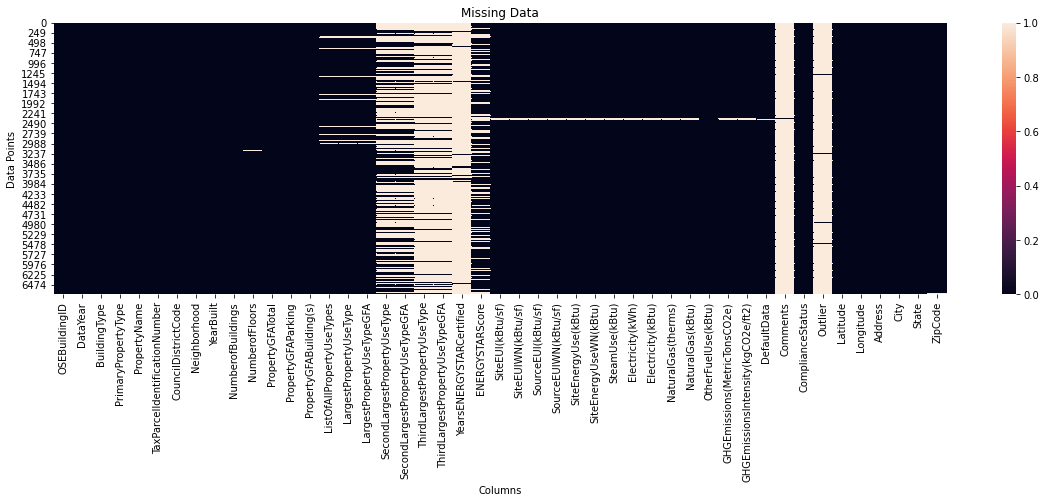

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df.isnull(), ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

In [ ]:
obj = df.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

OSEBuildingID , 0.0
DataYear , 0.0
BuildingType , 0.0
PrimaryPropertyType , 0.0
PropertyName , 0.0
TaxParcelIdentificationNumber , 0.03
CouncilDistrictCode , 0.0
Neighborhood , 0.0
YearBuilt , 0.0
NumberofBuildings , 0.12
NumberofFloors , 0.12
PropertyGFATotal , 0.0
PropertyGFAParking , 0.0
PropertyGFABuilding(s) , 0.0
ListOfAllPropertyUseTypes , 2.03
LargestPropertyUseType , 2.32
LargestPropertyUseTypeGFA , 2.32
SecondLargestPropertyUseType , 51.790000000000006
SecondLargestPropertyUseTypeGFA , 51.790000000000006
ThirdLargestPropertyUseType , 82.78999999999999
ThirdLargestPropertyUseTypeGFA , 82.78999999999999
YearsENERGYSTARCertified , 96.59
ENERGYSTARScore , 24.169999999999998
SiteEUI(kBtu/sf) , 0.25
SiteEUIWN(kBtu/sf) , 0.24
SourceEUI(kBtu/sf) , 0.27999999999999997
SourceEUIWN(kBtu/sf) , 0.27999999999999997
SiteEnergyUse(kBtu) , 0.22
SiteEnergyUseWN(kBtu) , 0.24
SteamUse(kBtu) , 0.27999999999999997
Electricity(kWh) , 0.27999999999999997
Electricity(kBtu) , 0.27999999999999997
Natur

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


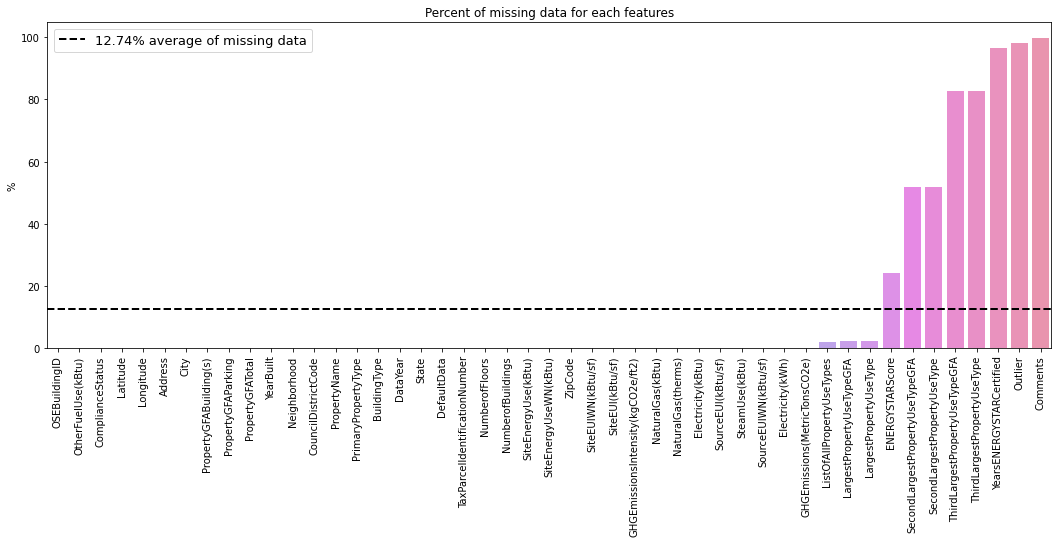

In [ ]:
fig = plt.figure(figsize=(18,6))

null_prop = df.isnull().sum(axis=0).sum()/len(df)/len(df.columns)*100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% average of missing data'.format(null_prop)], fontsize=13)

null = df.isnull().sum(axis=0).sort_values()/len(df)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Percent of missing data for each features")
plt.xticks(rotation=90)
plt.show()


## 5. Data Cleaning


### 5.1 Missing Values
#### *Colums/Features*
The goal here is to maximize the valuable data, therefore I took the decision to restrict the dataset to features with more than 50% data.

In addition some of the impacted column that are closed to the 50% of missing data target like 'SecondLargestPropertyUseType' or 'ThirdLargestPropertyUseType' have a lot of categories with only one row, therefore it will complexify our model.

In [ ]:
df2 = df[df.columns[df.isnull().mean() < 0.5]]
print("New dataframe shape : ", df.shape)

New dataframe shape :  (6716, 47)


Individus/Observations
The objective here is to remove rows with missing data.

created missing indicator for: TaxParcelIdentificationNumber
created missing indicator for: NumberofBuildings
created missing indicator for: NumberofFloors
created missing indicator for: ListOfAllPropertyUseTypes
created missing indicator for: LargestPropertyUseType
created missing indicator for: LargestPropertyUseTypeGFA
created missing indicator for: ENERGYSTARScore
created missing indicator for: SiteEUI(kBtu/sf)
created missing indicator for: SiteEUIWN(kBtu/sf)
created missing indicator for: SourceEUI(kBtu/sf)
created missing indicator for: SourceEUIWN(kBtu/sf)
created missing indicator for: SiteEnergyUse(kBtu)
created missing indicator for: SiteEnergyUseWN(kBtu)
created missing indicator for: SteamUse(kBtu)
created missing indicator for: Electricity(kWh)
created missing indicator for: Electricity(kBtu)
created missing indicator for: NaturalGas(therms)
created missing indicator for: NaturalGas(kBtu)
created missing indicator for: GHGEmissions(MetricTonsCO2e)
created missing indicato

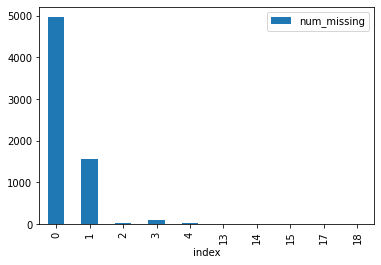

In [ ]:
df_miss = df2.copy()

# first create missing indicator for features with missing data
for col in df_miss.columns:
    missing = df_miss[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_miss['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_miss.columns if 'ismissing' in col]
df_miss['num_missing'] = df_miss[ismissing_cols].sum(axis=1)

#fig, ax = plt.subplots(figsize=(20,10))
df_miss['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [ ]:
ind_missing = df_miss[df_miss['num_missing'] > 3].index
df2 = df2.drop(ind_missing, axis=0)
print("New dataframe shape : ", df2.shape)

New dataframe shape :  (6674, 40)


### 5.3 Inconsistent Data


#### 5.3.1 *Capitalization*


In [ ]:
df2['Neighborhood'].value_counts(dropna=False)

DOWNTOWN                  1146
EAST                       895
MAGNOLIA / QUEEN ANNE      836
GREATER DUWAMISH           740
NORTHEAST                  533
LAKE UNION                 496
NORTHWEST                  433
NORTH                      332
SOUTHWEST                  325
BALLARD                    253
CENTRAL                    237
SOUTHEAST                  191
DELRIDGE                   165
North                       42
Central                     27
Northwest                   11
Ballard                      7
Delridge                     4
DELRIDGE NEIGHBORHOODS       1
Name: Neighborhood, dtype: int64

In [ ]:
# make everything lower case and replace the inconsistent value
df['Neighborhood'] = df['Neighborhood'].str.lower()
df['Neighborhood'] = df['Neighborhood'].replace('delridge neighborhoods', 'delridge')
df['Neighborhood'].value_counts(dropna=False)

downtown                 1151
east                      897
magnolia / queen anne     843
greater duwamish          744
northeast                 539
lake union                500
northwest                 447
north                     375
southwest                 331
central                   265
ballard                   263
southeast                 191
delridge                  170
Name: Neighborhood, dtype: int64

#### 5.4.2 *Gross Floor Area*
I check the consistency of the data related to the gross floor area (GFA). According to the dataset source, I know that the total GFA area of the property must be equal to the sum of the GFA areas of the buildings and parking lots (PropertyGFATotal = PropertyGFAParking + PropertyGFABuilding(s))


In [ ]:
sum_propertyGFA = df2[['PropertyGFAParking','PropertyGFABuilding(s)']].sum(axis=1)
buildings_equ = sum_propertyGFA == df2.PropertyGFATotal

consistent_buildings = df2[buildings_equ]

print("Total Data Shape :", df2.shape)
print("GFA Formula Consistant Data Shape :", consistent_buildings.shape)

Total Data Shape : (6674, 40)
GFA Formula Consistant Data Shape : (6674, 40)


#### 5.4.3 *Site Energy Use*

In [ ]:
df2[['SiteEnergyUse(kBtu)','SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']].describe()


,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu)
count,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,5.195637e+06,2.614098e+05,3.590509e+06,1.311097e+06,3.563659e+03
std,1.816279e+07,3.707100e+06,1.250212e+07,5.692987e+06,1.386801e+05
min,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,0.000000e+00
25%,9.216450e+05,0.000000e+00,6.380345e+05,0.000000e+00,0.000000e+00
50%,1.792145e+06,0.000000e+00,1.167992e+06,3.046505e+05,0.000000e+00
75%,4.135558e+06,0.000000e+00,2.795440e+06,1.150674e+06,0.000000e+00
max,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,8.269669e+06


I verify the following information:

Total energy consumption must equal the sum of the types of energy consumed (SiteEnergyUse(kBtu) = SteamUse(kBtu) + Electricity(kBtu) + NaturalGas(kBtu) + OtherFuelUse(kBtu))

In [ ]:
sum_SEU = df2[['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']].sum(axis=1)
tolerance = [0,0.01,0.05]

for tol in tolerance:
    low_level = 1 - tol
    high_level = 1 + tol

    buildings_SEU = (df2['SiteEnergyUse(kBtu)'] >= sum_SEU * low_level) & (df2['SiteEnergyUse(kBtu)'] <= sum_SEU * high_level)

    consistent_buildings = df2[buildings_SEU]
    display(consistent_buildings.shape)

(535, 40)

(6609, 40)

(6618, 40)

In [ ]:
df2 = consistent_buildings

### 5.2 Unnecessary Data


#### 5.3.1 *Duplicates*

In [ ]:
#key = ['OSEBuildingID']

#duplicates = df2.duplicated(subset=key, keep=False)
#df2[duplicates].sort_values(by='OSEBuildingID')

There are buildings in 2015 and 2016. If I let it, it will distort my modeling because the building does not exist twice physically. Therefore, I decide to keep the most recent observation in case of duplication, i.e. 2016.

In [ ]:
#df_without_duplicates = df2.sort_values(by=['OSEBuildingID', 'DataYear']).drop_duplicates('OSEBuildingID', keep='last')
#print("New dataframe shape : ", df_without_duplicates.shape)
#df_without_duplicates.head(5)

#### 5.3.2 *Problematic Irrelevant*

Let's select the features and the data based on the problematic : 
- Non-Residential
- Compliant value

Then let's delete the features that are not relevant

In [ ]:
nb = sum(~df2['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']))
print("The number of residential building is : {}".format(nb))
df2 = df2[df2['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA'])]
nb2 = sum(~df2['ComplianceStatus'].isin(['Compliant']))
print("The number of non-compliant building is : {}".format(nb2))
df2 = df2[df2['ComplianceStatus'].isin(['Compliant'])]
# Let's delete the ComplianceStatus feature as it is uninformative
cols_to_drop = ['ComplianceStatus']
df2 = df2.drop(cols_to_drop, axis=1)
print("New dataframe shape : ", df2.shape)

The number of residential building is : 3364
The number of non-compliant building is : 106
New dataframe shape :  (3148, 39)


#### 5.3.3 *Uninformative / Repetitive*

In [ ]:
num_rows = len(df2.index)
low_information_cols = [] #

for col in df2.columns:
    cnts = df2[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.4:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

DataYear: 51.39771%
2015    1618
2016    1530
Name: DataYear, dtype: int64

BuildingType: 90.94663%
NonResidential        2863
Nonresidential COS     137
SPS-District K-12      103
Campus                  44
Nonresidential WA        1
Name: BuildingType, dtype: int64

NumberofBuildings: 96.34689%
1.0     3033
0.0       51
2.0       15
3.0       14
5.0        7
6.0        6
4.0        5
7.0        4
14.0       2
10.0       2
8.0        2
11.0       2
27.0       1
23.0       1
9.0        1
16.0       1
39.0       1
Name: NumberofBuildings, dtype: int64

PropertyGFAParking: 78.68488%
0         2477
13320        6
10800        4
30000        4
25800        4
          ... 
12998        1
195283       1
23086        1
13038        1
97325        1
Name: PropertyGFAParking, Length: 365, dtype: int64

SteamUse(kBtu): 93.23380%
0.000000e+00    2935
2.726250e+06       1
4.403788e+06       1
4.731090e+06       1
4.337738e+06       1
                ... 
1.014422e+06       1
1.757800e+05       1


Let's delete the repetitive features that are  uninformative like City or State

In [ ]:
cols_to_drop = ['City', 'State']
df2 = df2.drop(cols_to_drop, axis=1)
print("New dataframe shape : ", df2.shape)

New dataframe shape :  (3148, 37)


Let's convert the similar values

In [ ]:
df2.loc[df2["DefaultData"] == False, "DefaultData"] = 'No'
df2.loc[df2["DefaultData"] == True, "DefaultData"] = 'Yes'

Let's regroup the primary property type

In [ ]:
df2.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    576
Other                          482
Large Office                   336
Mixed Use Property             214
Non-Refrigerated Warehouse     186
Warehouse                      185
Retail Store                   182
K-12 School                    179
Hotel                          148
Worship Facility               141
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Senior Care Community           39
Supermarket / Grocery Store     39
Supermarket/Grocery Store       36
Self-Storage Facility           28
Self-Storage Facility\n         27
Refrigerated Warehouse          24
University                      21
College/University              21
Residence Hall                  21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      10
Restaurant\n                    10
SPS-District K-12                4
Low-Rise Multifamily

We can see that some of the category can be regroup and some are related to residential building therefore they need ot be deleted

In [ ]:
df2.loc[df2["PrimaryPropertyType"] == "Restaurant\n", "PrimaryPropertyType"] = 'Restaurant'
df2.loc[df2["PrimaryPropertyType"] == "Distribution Center\n", "PrimaryPropertyType"] = 'Distribution Center'
df2.loc[df2["PrimaryPropertyType"] == "Non-Refrigerated Warehouse", "PrimaryPropertyType"] = 'Warehouse'
df2.loc[df2["PrimaryPropertyType"] == "Refrigerated Warehouse", "PrimaryPropertyType"] = 'Warehouse'
df2.loc[df2["PrimaryPropertyType"] == "Self-Storage Facility", "PrimaryPropertyType"] = 'Warehouse'
df2.loc[df2["PrimaryPropertyType"] == "Self-Storage Facility\n", "PrimaryPropertyType"] = 'Warehouse'
df2.loc[df2["PrimaryPropertyType"] == "Large Office", "PrimaryPropertyType"] = 'Office'
df2.loc[df2["PrimaryPropertyType"] == "Small- and Mid-Sized Office", "PrimaryPropertyType"] = 'Office'
df2.loc[df2["PrimaryPropertyType"] == "Medical Office", "PrimaryPropertyType"] = 'Office'
df2.loc[df2["PrimaryPropertyType"] == "K-12 School", "PrimaryPropertyType"] = 'School/University'
df2.loc[df2["PrimaryPropertyType"] == "College/University", "PrimaryPropertyType"] = 'School/University'
df2.loc[df2["PrimaryPropertyType"] == "University", "PrimaryPropertyType"] = 'School/University'
df2.loc[df2["PrimaryPropertyType"] == "Mixed Use Property", "PrimaryPropertyType"] = 'Other'
df2.loc[df2["PrimaryPropertyType"] == "Retail Store", "PrimaryPropertyType"] = 'Supermarket/Grocery/Retail Store'
df2.loc[df2["PrimaryPropertyType"] == "Supermarket / Grocery Store", "PrimaryPropertyType"] = 'Supermarket/Grocery/Retail Store'
df2.loc[df2["PrimaryPropertyType"] == "Supermarket/Grocery Store", "PrimaryPropertyType"] = 'Supermarket/Grocery/Retail Store'
df2.loc[df2["PrimaryPropertyType"] == "Hospital", "PrimaryPropertyType"] = 'Hospital/Laboratory'
df2.loc[df2["PrimaryPropertyType"] == "Laboratory", "PrimaryPropertyType"] = 'Hospital/Laboratory'
df2.loc[df2["PrimaryPropertyType"] == "Senior Care Community", "PrimaryPropertyType"] = 'Hotel'
df2 = df2[~df2['PrimaryPropertyType'].isin(["Low-Rise Multifamily", "Residence Hall", "Residence Hall/Dormitory","SPS-District K-12"])]

In [ ]:
df2.PrimaryPropertyType.value_counts()

Office                              994
Other                               696
Warehouse                           450
Supermarket/Grocery/Retail Store    257
School/University                   221
Hotel                               187
Worship Facility                    141
Distribution Center                 106
Hospital/Laboratory                  30
Restaurant                           22
Name: PrimaryPropertyType, dtype: int64

### 5.4 Outliers

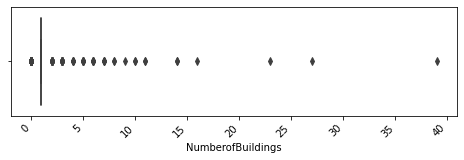

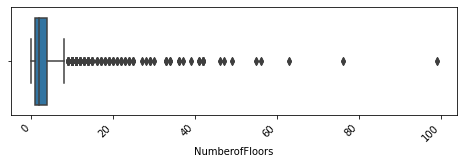

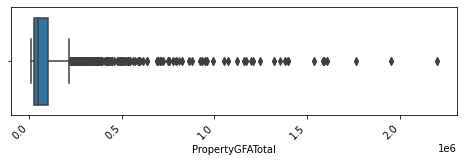

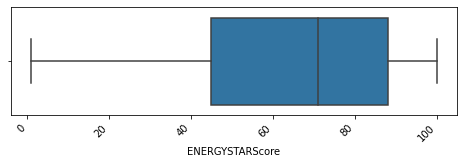

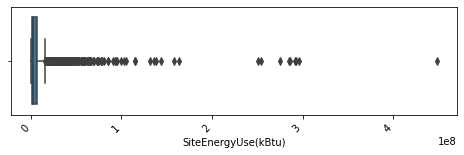

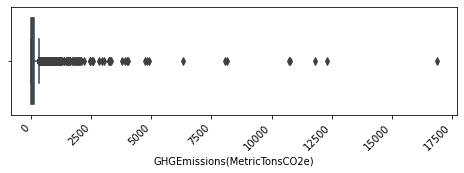

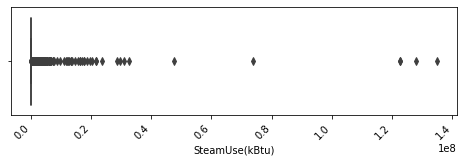

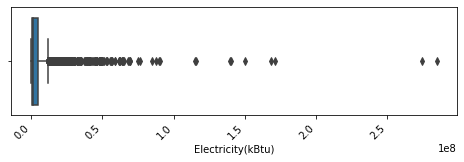

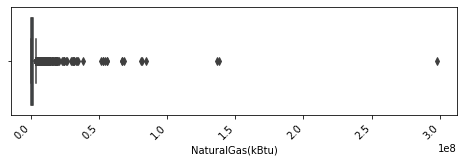

In [ ]:
cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

for col in df2[cols].columns:
    fig = plt.figure(1, figsize=(8,2))
    sns.boxplot(data = df2,  x = col)
    plt.xticks(rotation=45, ha = "right")
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

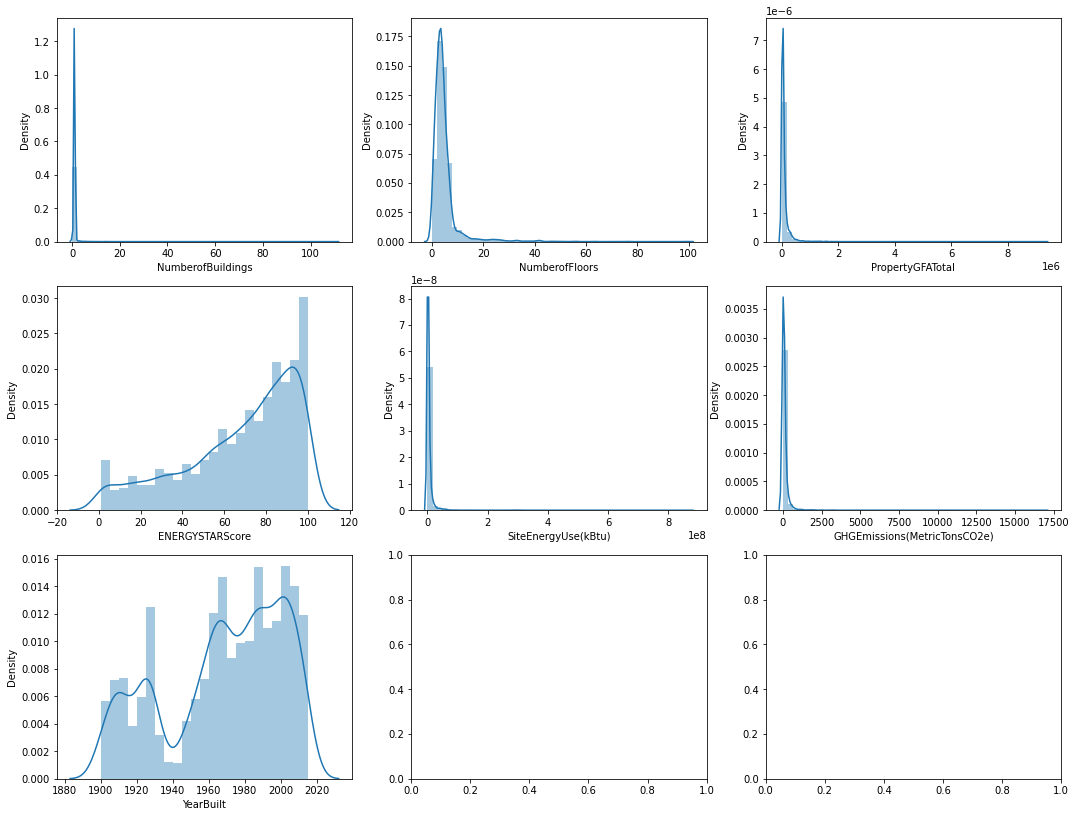

In [ ]:
def plot_multiple_histograms(df, cols):
    matplotlib.rcParams['figure.figsize'] = (18,14)
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df, ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'YearBuilt'])

matplotlib.rcParams["figure.figsize"] = [6.4, 4.8]


In [ ]:
df2 = df2[df2['SiteEnergyUse(kBtu)'] > 0]

#### 5.2.2 *Number of floors*

Let's quickly process what are the outliers on the number of floors

In [ ]:
df2.sort_values(by='NumberofFloors', ascending=False).head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Latitude,Longitude,Address,ZipCode
1371,21611,2015,NonResidential,Worship Facility,CHINESE BAPTIST CHURCH,2124049098,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,21948,Worship Facility,Worship Facility,21948.0,54.0,14.500000,14.500000,45.500000,45.500000,3.182050e+05,3.182050e+05,0.000,93261.0,318218.0,0.00000,0.0,0.0,2.22,0.04,Yes,47.55057128,-122.302943,5801 BEACON AVE S,98108
4699,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,2124049098,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,21948,Worship Facility,Worship Facility,21948.0,80.0,14.900000,14.900000,46.599998,46.599998,3.260012e+05,3.260012e+05,0.000,95545.5,326001.0,0.00000,0.0,0.0,2.27,0.10,No,47.5507,-122.303,5801 Beacon Avenue South,98108
581,775,2015,NonResidential,Office,COLUMBIA CENTER,942000640,7,DOWNTOWN,1985,1.0,76.0,1952220,319400,1632820,"Office, Parking",Office,1680937.0,84.0,56.300000,55.500000,171.900000,169.100000,9.456009e+07,9.325544e+07,0.000,26597630.0,90754881.0,38090.00000,3808965.0,0.0,834.96,0.23,No,47.60466039,-122.33028619,701 5TH AVE,98104
3899,775,2016,NonResidential,Office,Columbia Center - 2015,0942000640,7,DOWNTOWN,1985,1.0,76.0,1952220,319400,1632820,"Office, Parking",Office,1680937.0,86.0,55.299999,55.099998,167.300003,166.500000,9.293764e+07,9.253726e+07,0.000,25747908.0,87851862.0,50857.63281,5085763.0,0.0,882.56,0.45,No,47.6045,-122.331,701 5th Avenue,98104
3573,357,2016,Nonresidential COS,Office,Seattle Municipal Tower (2030),0942000720,3,DOWNTOWN,1990,1.0,63.0,1354987,159600,1195387,"Office, Parking",Office,1191115.0,89.0,50.400002,50.400002,158.100006,158.100006,6.157618e+07,6.157618e+07,0.000,18046946.0,61576180.0,0.00000,0.0,0.0,429.27,0.32,No,47.605,-122.33,700 Fifth Avenue,98104
235,357,2015,Nonresidential COS,Office,SEATTLE MUNICIPAL TOWER,942000720,3,DOWNTOWN,1990,1.0,63.0,1195387,159600,1035787,"Office, Other, Parking",Office,1187924.0,82.0,53.600000,54.600000,168.400000,171.300000,6.471565e+07,6.584274e+07,0.000,18960680.0,64696526.0,218.00000,21804.0,0.0,452.16,0.15,No,47.60491077,-122.32891587,700 5TH AVE,98104
3632,422,2016,NonResidential,Office,Two Union Square,1976700125,7,DOWNTOWN,1989,1.0,56.0,1605578,389860,1215718,"Office, Other, Parking",Office,1314475.0,97.0,36.799999,37.900002,110.300003,113.300003,4.951770e+07,5.098450e+07,915654.875,13505807.0,46081813.0,25202.29883,2520230.0,0.0,525.78,0.33,No,47.6104,-122.332,601 Union St.,98101
293,422,2015,NonResidential,Office,TWO UNION SQUARE,1976700125,7,DOWNTOWN,1989,1.0,56.0,1605578,389860,1215718,"Office, Other, Parking",Office,1314475.0,97.0,35.900000,37.100000,108.000000,111.800000,4.834256e+07,4.997341e+07,595133.000,13243190.0,45187640.0,25617.00000,2561662.0,0.0,496.99,0.19,No,47.61001362,-122.3323936,601 UNION ST,98101
3611,399,2016,NonResidential,Office,1201 Third Avenue,1974700120,7,DOWNTOWN,1988,1.0,55.0,1400000,285000,1115000,"Office, Other, Parking, Restaurant",Office,994116.0,92.0,46.700001,48.500000,140.199997,145.300003,5.307916e+07,5.514030e+07,2179487.750,14499658.0,49472833.0,14268.40039,1426840.0,0.0,588.90,0.42,No,47.6072,-122.336,1201 3rd ave,98101
271,399,2015,NonResidential,Office,WASH MUTUAL TOWER (1201 THIRD AVE),1974700120,7,DOWNTOWN,1988,1.0,55.0,1400000,285000,1115000,"Office, Other, Parking, Restaurant",Office,1021940.0,94.0,44.700000,47.500000,134.200000,142.000000,5.162555e+07,5.483092e+07,1923581.000,14092

Seattle Chinese Baptist Church is not a 99-storey building.

In [ ]:
df2.loc[df2['OSEBuildingID'] == 21611, 'NumberofFloors'] = 1


#### 5.2.3 *Number of Buildings*

In [ ]:
df2.sort_values(by='NumberofBuildings', ascending=False).head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Latitude,Longitude,Address,ZipCode
1508,22062,2015,Campus,School/University,SEATTLE UNIVERSITY (MAIN CAMPUS),2254500880,3,EAST,1939,39.0,2.0,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,NaN,66.900000,76.400000,146.100000,158.300000,115080128.0,131427232.0,0.0,18292370.0,62416157.0,526666.00000,52666569.0,0.0,3232.23,1.35,No,47.60869656,-122.3145944,901 12TH AVE,98122
3445,172,2016,Campus,School/University,SSCC MAIN CAMPUS,6171900005,1,DELRIDGE,1970,27.0,2.0,441071,0,441071,College/University,College/University,483000.0,NaN,79.300003,85.199997,192.800003,202.600006,38301744.0,41151732.0,0.0,7419277.5,25314575.0,129871.66410,12987166.0,0.0,866.23,1.96,No,47.547,-122.353,6000 16th Ave SW,98106
5202,23622,2016,Campus,Other,FT C15 Fishermen's Center,7666200105,7,MAGNOLIA / QUEEN ANNE,1955,23.0,1.0,260241,0,260241,Other,Other,260241.0,NaN,130.699997,138.500000,353.200012,374.500000,34012980.0,36034584.0,0.0,7882361.0,26894616.0,71183.61719,7118362.0,0.0,565.55,2.17,No,47.6556,-122.381,1900 West Nickerson Street,98119
161,261,2015,Campus,Office,BOEING SOUTH PARK CAMPUS REPORT,7883608601,1,GREATER DUWAMISH,1980,16.0,2.0,334368,31874,302494,"Laboratory, Office, Parking",Office,260000.0,NaN,154.500000,157.500000,439.300000,442.500000,52273792.0,53294752.0,0.0,13149160.0,44866796.0,74089.00000,7408855.0,0.0,706.26,1.53,No,47.52440204,-122.3115544,1420 S TRENTON ST,98108
5665,25251,2016,Campus,School/University,5th Avenue Master Meter,8900000555,7,MAGNOLIA / QUEEN ANNE,1945,14.0,2.0,537000,0,537000,College/University,College/University,533826.0,NaN,169.699997,181.300003,266.799988,278.899994,90609640.0,96775464.0,0.0,6629278.0,22619097.0,679905.37500,67990538.0,0.0,3768.66,7.02,No,47.6502,-122.362,3307 3rd Ave. W,98119
3502,261,2016,Campus,Office,South Park,7883608601,1,GREATER DUWAMISH,1980,14.0,2.0,334368,31874,302494,"Laboratory, Non-Refrigerated Warehouse, Office...",Office,240984.0,NaN,159.899994,161.899994,451.200012,453.299988,53466684.0,54136068.0,0.0,13282936.0,45321378.0,81453.00000,8145300.0,0.0,748.55,2.24,No,47.5243,-122.312,1420 S Trenton,98108
127,211,2015,Campus,School/University,NORTH SEATTLE COMMUNITY COLLEGE CAMPUS MASTER ID,3226049021,5,NORTHWEST,1970,11.0,2.0,694072,111625,582447,College/University,College/University,667265.0,NaN,55.600000,59.200000,162.300000,169.800000,37117212.0,39513408.0,0.0,9725151.0,33183593.0,39350.00000,3934997.0,0.0,440.31,0.43,No,47.69879162,-122.3338342,9600 COLLEGE WAY N,98103
3468,211,2016,Campus,School/University,NSCC MAIN CAMPUS,3226049021,5,NORTHWEST,1970,11.0,2.0,694072,111625,582447,College/University,College/University,667335.0,NaN,53.799999,56.099998,161.199997,167.000000,35891484.0,37410800.0,0.0,9803878.0,33450832.0,24406.47852,2440648.0,0.0,362.82,0.52,No,47.6994,-122.334,9600 COLLEGE WAY N,98103
2015,24086,2015,Campus,Other,KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...,7666203387,2,GREATER DUWAMISH,1991,10.0,NaN,180796,0,180796,"Other, Parking",Other,230970.0,NaN,129.600000,146.700000,287.400000,305.300000,29939196.0,33884892.0,0.0,4900163.0,16720050.0,132198.00000,13219839.0,0.0,818.66,4.13,No,47.59113039,-122.3233985,1333 AIRPORT WAY S,98134
5333,24086,2016,Campus,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,7666203387,2,GREATER DUWAMISH,1991,10.0,0.0,230971,0,230971,"Other, Parking",Other,230970.0,NaN,91.000000,96.1

## 6. Features Engineering
### 6.1 Building Age

In [ ]:
df2['BuildingAge'] = df2['DataYear'].astype(int)-df2['YearBuilt']
print("New dataframe shape : ", df2.shape)

New dataframe shape :  (3102, 38)


### 6.2 Energy Proportion

In [ ]:
df2["Electricity"] = df2["Electricity(kBtu)"]/df2["SiteEnergyUse(kBtu)"]
df2["NaturalGas"] = df2["NaturalGas(kBtu)"]/df2["SiteEnergyUse(kBtu)"]
df2["SteamUse"] = df2["SteamUse(kBtu)"]/df2["SiteEnergyUse(kBtu)"]
df2["OtherFuelUse"] = df2["OtherFuelUse(kBtu)"]/df2["SiteEnergyUse(kBtu)"]

In [ ]:
df2['MainEnergy'] = df2[['Electricity','NaturalGas','SteamUse','OtherFuelUse']].idxmax(axis=1)
df2

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Latitude,Longitude,Address,ZipCode,BuildingAge,Electricity,NaturalGas,SteamUse,OtherFuelUse,MainEnergy
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,0.0,249.43,2.64,No,47.61219025,-122.33799744,405 OLIVE WAY,98101,88,0.527995,0.182253,0.289773,0.0,Electricity
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,0.0,263.51,2.38,No,47.61310583,-122.33335756,724 PINE ST,98101,19,0.467477,0.532542,0.000000,0.0,NaturalGas
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,0.0,2061.48,1.92,Yes,47.61334897,-122.33769944,1900 5TH AVE,98101,46,0.680459,0.050730,0.268839,0.0,Electricity
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,0.0,1936.34,31.38,No,47.61421585,-122.33660889,620 STEWART ST,98101,89,0.098090,0.070915,0.830998,0.0,SteamUse
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,0.0,507.70,4.02,No,47.6137544,-122.3409238,401 LENORA ST,98121,35,0.409077,0.590940,0.000000,0.0,NaturalGas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,50221,2016,Nonresidential COS,Other,High Point Community Center,2524039059,1,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,NaN,51.000000,56.200001,126.000000,136.600006,9.320821e+05,1.025432e+06,0.0,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,0.0,20.33,1.11,No,47.5407,-122.374,6920 34th Ave SW,NaN,34,0.678440,0.321560,0.000000,0.0,Electricity
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,0.0,32.17,2.01,No,47.5962,-122.323,719 8th Ave S,NaN,12,0.417296,0.582704,0.000000,0.0,NaturalGas
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,0.0,223.54,16.99,No,47.6364,-122.358,1920 1st Ave W,NaN,42,0.310820,0.689180,0.00

### 6.3 Building GFA Proportion

In [ ]:
df2['GFABuildings_prop'] = df2['PropertyGFABuilding(s)'] / df2['PropertyGFATotal']
df2['GFABuildings_prop']

0       1.000000
1       0.854547
2       1.000000
3       1.000000
4       0.896071
          ...   
6710    1.000000
6712    1.000000
6713    1.000000
6714    1.000000
6715    1.000000
Name: GFABuildings_prop, Length: 3102, dtype: float64

### 6.4 Floors

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df2['NumberofFloors'].quantile(quantile_list)
quantiles

0.00     0.0
0.25     1.0
0.50     2.0
0.75     4.0
1.00    76.0
Name: NumberofFloors, dtype: float64

In [ ]:
df2['Binned_Floors'] = pd.cut(df2['NumberofFloors'], bins=[0, 1, 2, 4, 76], labels=[1, 2, 3, 4])
df2[['NumberofFloors','Binned_Floors']].head(10)

,NumberofFloors,Binned_Floors
0,12.0,4
1,11.0,4
2,41.0,4
3,10.0,4
4,18.0,4
5,2.0,2
6,11.0,4
7,8.0,4
8,15.0,4
10,11.0,4


## Features Selection

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 0 to 6715
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   OSEBuildingID                      3102 non-null   int64   
 1   DataYear                           3102 non-null   int64   
 2   BuildingType                       3102 non-null   object  
 3   PrimaryPropertyType                3102 non-null   object  
 4   PropertyName                       3102 non-null   object  
 5   TaxParcelIdentificationNumber      3101 non-null   object  
 6   CouncilDistrictCode                3102 non-null   int64   
 7   Neighborhood                       3102 non-null   object  
 8   YearBuilt                          3102 non-null   int64   
 9   NumberofBuildings                  3102 non-null   float64 
 10  NumberofFloors                     3094 non-null   float64 
 11  PropertyGFATotal                   3102 non

In [ ]:
df_model = df2[["OSEBuildingID", "DataYear", "PropertyName", "BuildingAge", "PrimaryPropertyType","NumberofBuildings", "Binned_Floors", "PropertyGFATotal", "GFABuildings_prop", "ENERGYSTARScore", "MainEnergy", "SiteEnergyUse(kBtu)", "Electricity", "NaturalGas", "SteamUse", "OtherFuelUse", "GHGEmissions(MetricTonsCO2e)", "CouncilDistrictCode", "Latitude", "Longitude"]]
df_model.shape
df_model

,OSEBuildingID,DataYear,PropertyName,BuildingAge,PrimaryPropertyType,NumberofBuildings,Binned_Floors,PropertyGFATotal,GFABuildings_prop,ENERGYSTARScore,MainEnergy,SiteEnergyUse(kBtu),Electricity,NaturalGas,SteamUse,OtherFuelUse,GHGEmissions(MetricTonsCO2e),CouncilDistrictCode,Latitude,Longitude
0,1,2015,MAYFLOWER PARK HOTEL,88,Hotel,1.0,4,88434,1.000000,65.0,Electricity,6.981428e+06,0.527995,0.182253,0.289773,0.0,249.43,7,47.61219025,-122.33799744
1,2,2015,PARAMOUNT HOTEL,19,Hotel,1.0,4,103566,0.854547,51.0,NaturalGas,8.354235e+06,0.467477,0.532542,0.000000,0.0,263.51,7,47.61310583,-122.33335756
2,3,2015,WESTIN HOTEL,46,Hotel,1.0,4,961990,1.000000,18.0,Electricity,7.313066e+07,0.680459,0.050730,0.268839,0.0,2061.48,7,47.61334897,-122.33769944
3,5,2015,HOTEL MAX,89,Hotel,1.0,4,61320,1.000000,1.0,SteamUse,2.822932e+07,0.098090,0.070915,0.830998,0.0,1936.34,7,47.61421585,-122.33660889
4,8,2015,WARWICK SEATTLE HOTEL,35,Hotel,1.0,4,119890,0.896071,67.0,NaturalGas,1.482910e+07,0.409077,0.590940,0.000000,0.0,507.70,7,47.6137544,-122.3409238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,50221,2016,High Point Community Center,34,Other,1.0,1,18261,1.000000,NaN,Electricity,9.320821e+05,0.678440,0.321560,0.000000,0.0,20.33,1,47.5407,-122.374
6712,50223,2016,International district/Chinatown CC,12,Other,1.0,1,16000,1.000000,NaN,NaturalGas,9.502762e+05,0.417296,0.582704,0.000000,0.0,32.17,2,47.5962,-122.323
6713,50224,2016,Queen Anne Pool,42,Other,1.0,1,13157,1.000000,NaN,NaturalGas,5.765898e+06,0.310820,0.689180,0.000000,0.0,223.54,7,47.6364,-122.358
6714,50225,2016,South Park Community Center,27,Other,1.0,1,14101,1.000000,NaN,NaturalGas,7.194712e+05,0.484898,0.515102,0.000000,0.0,22.11,1,47.5283,-122.324


In [ ]:
df_model.to_csv('df_seattle_modelization.csv')
drive.mount('/content/drive')
!cp df_seattle_modelization.csv "/content/drive/My Drive/OC_DataScientist/P4/"

Mounted at /content/drive
